In [236]:
import pandas as pd

# Load the dataset
data_path = 'shopping_trends.csv'
df = pd.read_csv(data_path)

# Overview of the dataset
df.head(15)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Venmo,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,PayPal,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


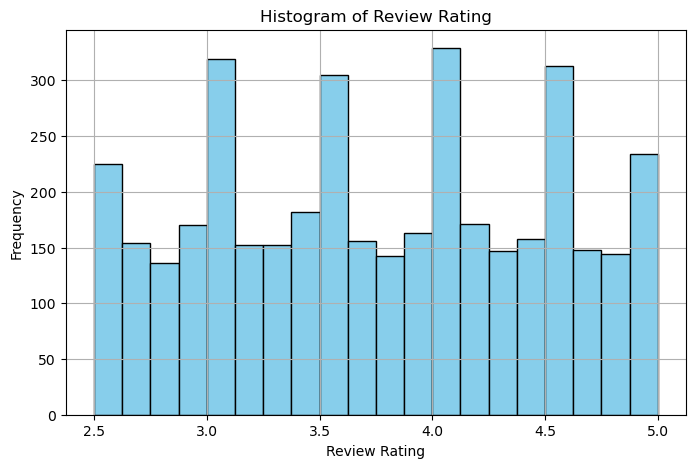

In [144]:
import matplotlib.pyplot as plt

def plot_histogram(df, column):
    plt.figure(figsize=(8, 5))
    df[column].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

plot_histogram(df, 'Review Rating')

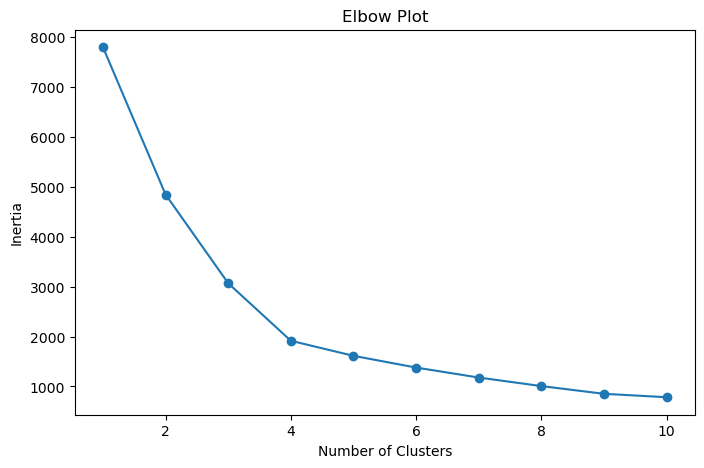

In [145]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def plot_elbow(df, features):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[features])
    
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_features)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.title('Elbow Plot')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

plot_elbow(df, ['Age', 'Purchase Amount (USD)'])  # Replace with relevant numerical columns


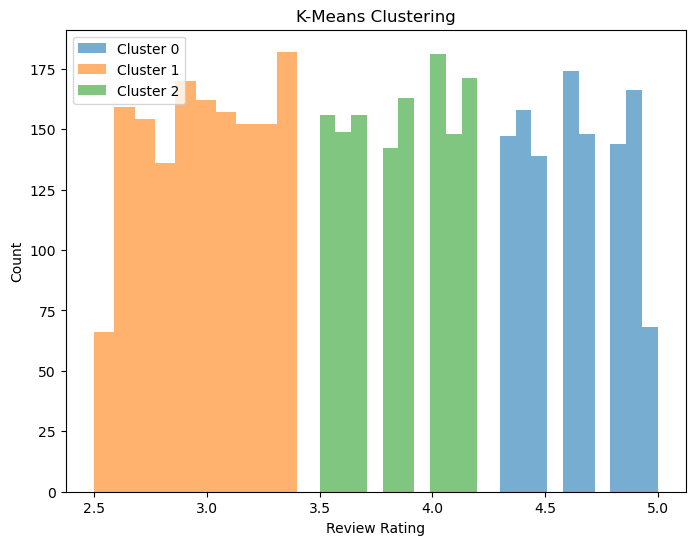

In [192]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def plot_clusters(df, features, n_clusters=3):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[features])
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(scaled_features)
    
    if len(features) == 1:
        # For single feature, use a histogram
        plt.figure(figsize=(8, 6))
        for cluster in range(n_clusters):
            cluster_data = df[df['Cluster'] == cluster]
            plt.hist(cluster_data[features[0]], bins=10, alpha=0.6, label=f'Cluster {cluster}')
        plt.xlabel(features[0])
        plt.ylabel('Count')
    else:
        # For two features, use a scatter plot
        plt.figure(figsize=(8, 6))
        for cluster in range(n_clusters):
            cluster_data = df[df['Cluster'] == cluster]
            plt.scatter(cluster_data[features[0]], cluster_data[features[1]], label=f'Cluster {cluster}')
        plt.xlabel(features[0])
        plt.ylabel(features[1])

    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

# Example usage
plot_clusters(df, ['Review Rating'], n_clusters=3)


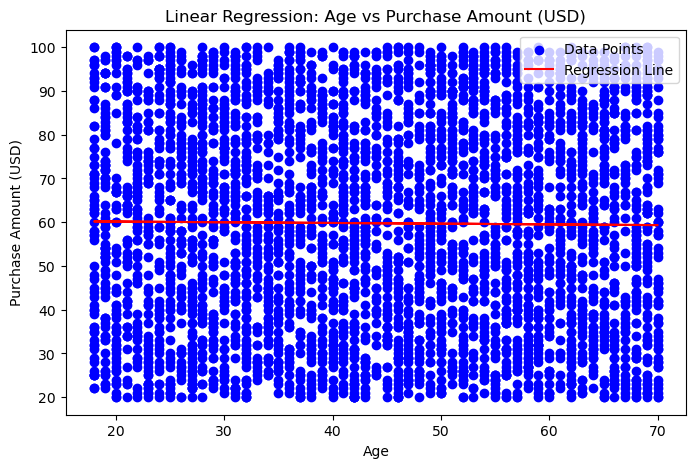

In [147]:
from sklearn.linear_model import LinearRegression
import numpy as np

def plot_regression(df, x_col, y_col):
    X = df[[x_col]]
    y = df[y_col]
    
    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(X)
    
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', label='Data Points')
    plt.plot(X, y_pred, color='red', label='Regression Line')
    plt.title(f'Linear Regression: {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.show()

plot_regression(df, 'Age', 'Purchase Amount (USD)')  # Replace with relevant columns


/var/folders/pr/qppkd3sx6nqgx0zy38s6k2_80000gn/T/ipykernel_12104/1636299023.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group_by, y=column, data=df, palette='Set2')


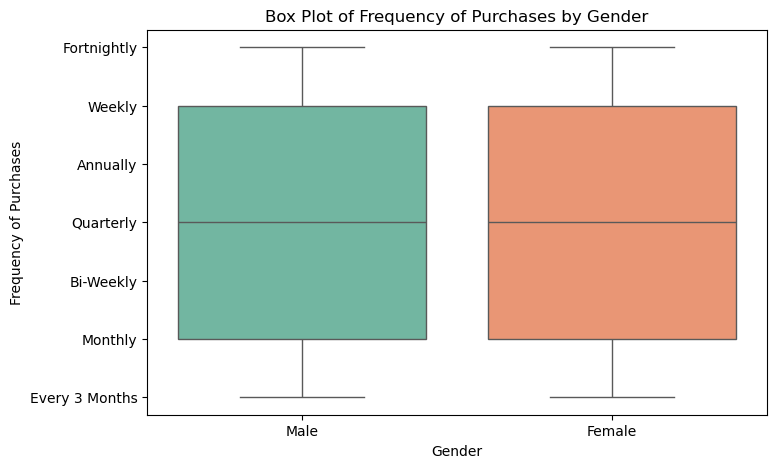

In [204]:
def plot_boxplot(df, column, group_by=None):
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")
    if group_by and group_by not in df.columns:
        raise ValueError(f"Column '{group_by}' not found in DataFrame.")
    
    plt.figure(figsize=(8, 5))
    
    if group_by:
        sns.boxplot(x=group_by, y=column, data=df, palette='Set2')
        plt.title(f'Box Plot of {column} by {group_by}')
        plt.xlabel(group_by)
    else:
        sns.boxplot(y=column, data=df, palette='Set2')
        plt.title(f'Box Plot of {column}')
    
    plt.ylabel(column)
    plt.show()

# Example Usage:
plot_boxplot(df, column='Frequency of Purchases', group_by='Gender')  # Adjust column names


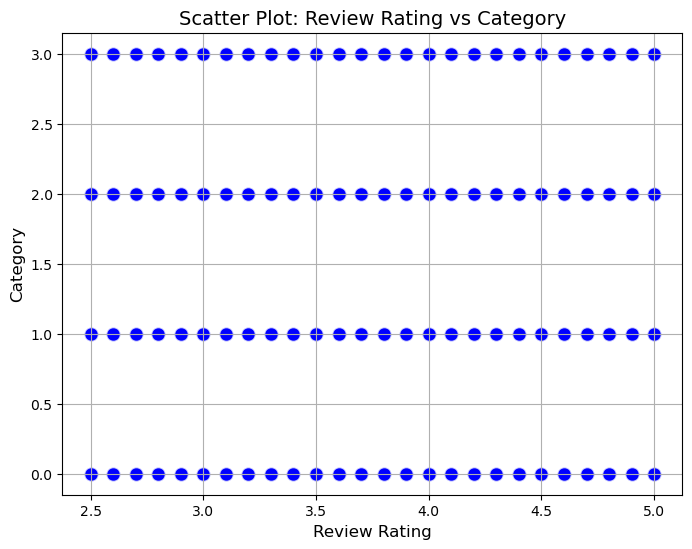

In [226]:
import matplotlib.pyplot as plt

# Example scatter plot
def scatter_plot(df, x_column, y_column):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_column], df[y_column], alpha=0.6, edgecolors='w', s=100, c='blue')
    plt.xlabel(x_column, fontsize=12)
    plt.ylabel(y_column, fontsize=12)
    plt.title(f'Scatter Plot: {x_column} vs {y_column}', fontsize=14)
    plt.grid(True)
    plt.show()

# Example usage (replace with actual column names from your dataset)
scatter_plot(df, 'Review Rating', 'Category')  # Replace 'Age' and 'Review Rating' with actual column names


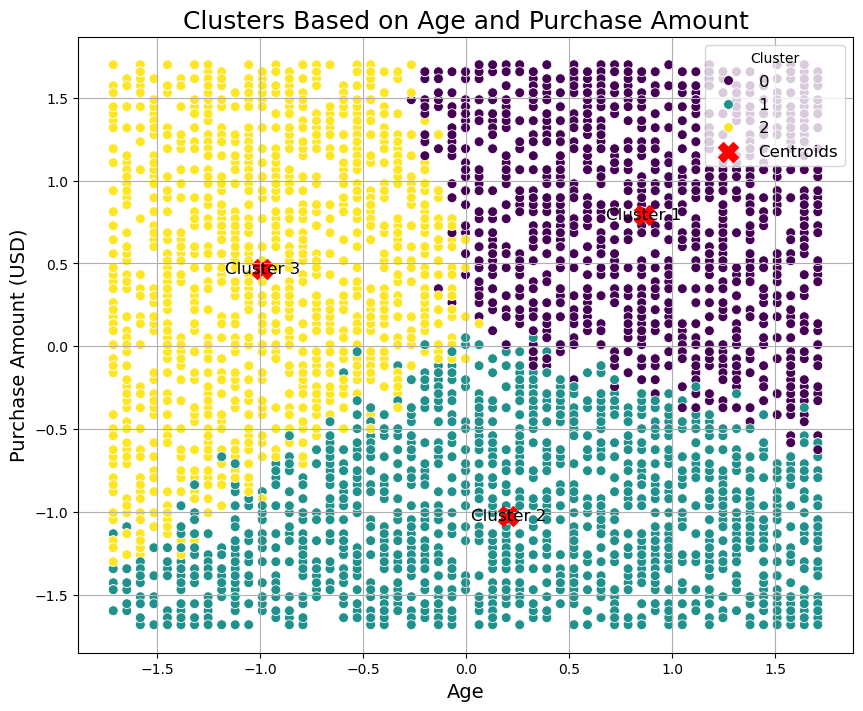

In [238]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Category' column
df['Category_encoded'] = LabelEncoder().fit_transform(df['Category'])

# Select features for clustering
selected_features = df[['Age', 'Purchase Amount (USD)', 'Category_encoded']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# Perform K-Means clustering
kmeans_model, cluster_labels = perform_kmeans_clustering(scaled_features, num_clusters=3)

# Plot the clusters (using the first two features for visualization)
plot_clusters(pd.DataFrame(scaled_features, columns=['Age', 'Purchase Amount (USD)', 'Category_encoded']),
              x_feature='Age', y_feature='Purchase Amount (USD)',
              cluster_labels=cluster_labels,
              centroids=kmeans_model.cluster_centers_,
              plot_title='Clusters Based on Age and Purchase Amount')
